# Data visualization with Seaborn

## Introduction

Seaborn is a modern data-visualization Python package

- Based on matplotlib ... and it uses matplotlib, indeed
- Pandas-aware
- Highlevel
- Advancedvisualizations
- Easy to use
    
Still under development!

**Most of this notebook requires Seaborn v >= 0.9.0**

## Initial setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(sns.__version__)

0.9.0


Graphical device must by initialized to avoid unexpected behavior. Two modes:
    - inline: static
    - notebook: interactive, only for browser-based devices

<IPython.core.display.Javascript object>


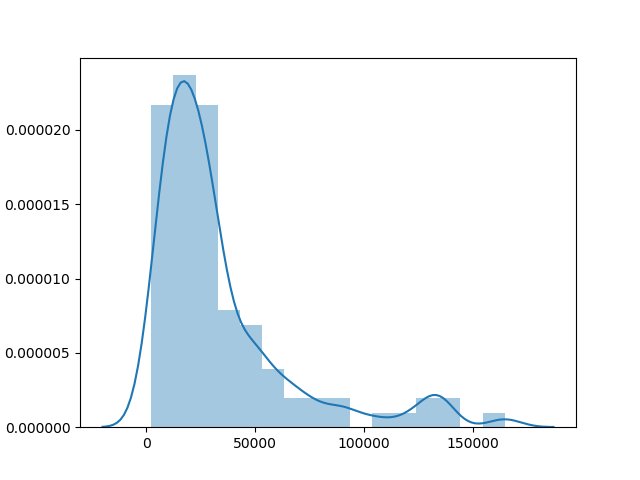

/anaconda3/envs/ml/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [2]:
%matplotlib notebook

sns.distplot(np.random.lognormal(10, 1, 100))

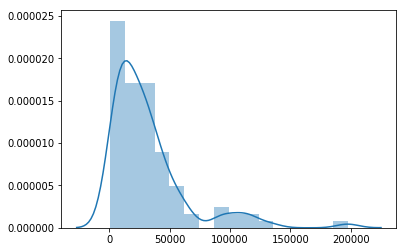

In [3]:
%matplotlib inline

sns.distplot(np.random.lognormal(10, 1, 100))

## Seaborn typical usage

1. Prepare data
2. Set up aesthetics
3. Plot
4. Customize the plot

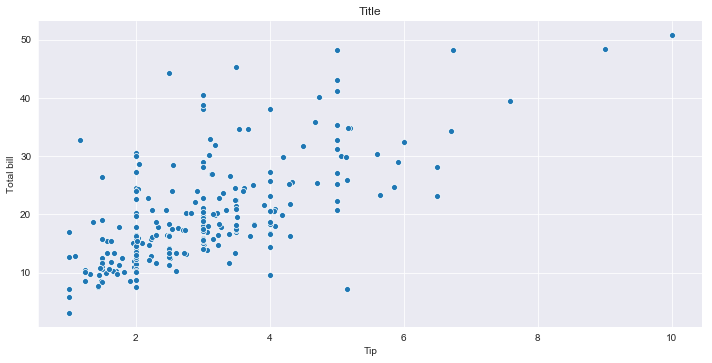

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt 
import seaborn as sns

# Prepare data
tips = sns.load_dataset("tips")

# Set up aesthetics 
sns.set_style("darkgrid")

# Plot
g = sns.relplot(x="tip", y="total_bill", data=tips, aspect=2) 

# Plot customization
plt.title("Title")
g.set_axis_labels('Tip', 'Total bill')

# Datasets

Seaborn comes with several datasets.

List of available datasets [here](https://github.com/mwaskom/seaborn-data).

We will use three datasets.

## Iris dataset

In [5]:
iris = sns.load_dataset('iris')
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


## Tips dataset

In [6]:
tips = sns.load_dataset('tips')
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


## Titanic dataset

In [7]:
titanic = sns.load_dataset('titanic')
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


# Seaborn aestethics

Styles: white, dark, whitegrid, darkgrid, ticks

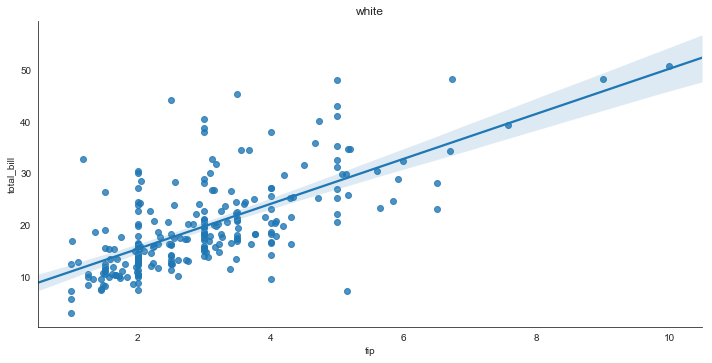

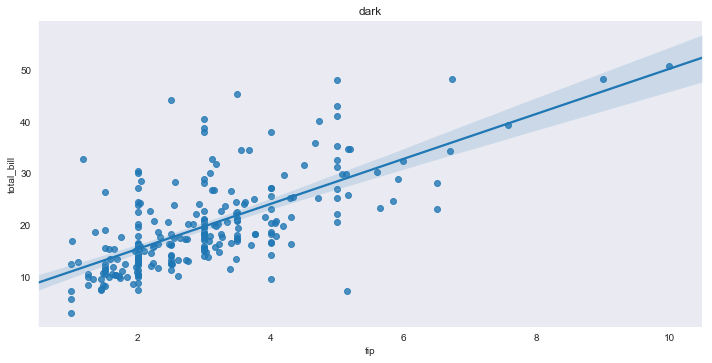

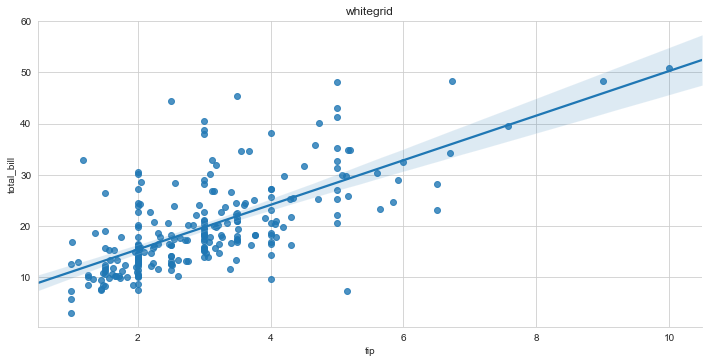

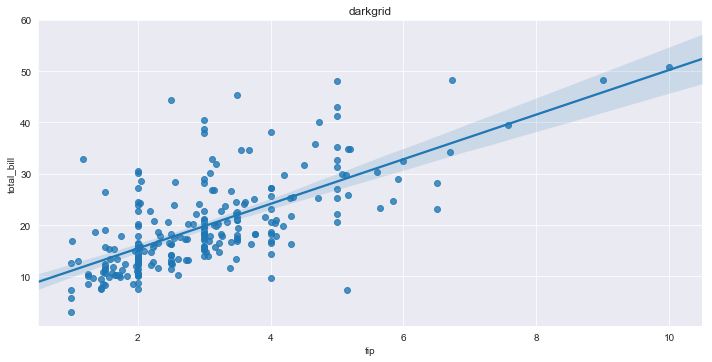

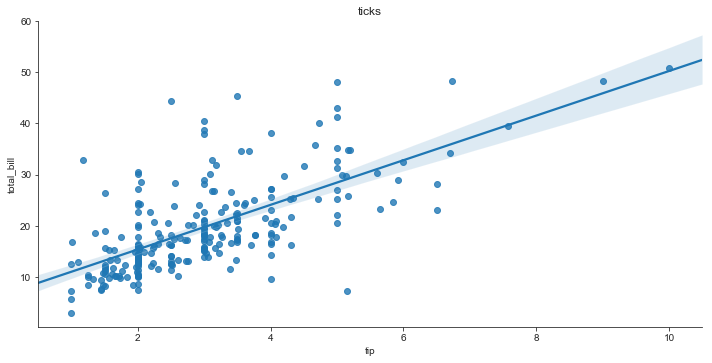

In [8]:
for theme in ['white', 'dark', 'whitegrid', 'darkgrid', 'ticks']:
    sns.set_style(theme)
    sns.lmplot(x="tip",y="total_bill", data=tips, aspect=2)
    plt.title(theme)

# Plot parameters

All Seaborn plots use the same parameters, with a similar expected behaviour, which makes Seaborn quite straitforward to use.

- *x*: Data axis x
- *y*: Data axis Y
- *data*: Dataframe name
- *hue*: Color
- *style*: Style
- *sizes*: Size
- *kind*: Alternate representation

Many plots have specific parameters.

# Univariable plots

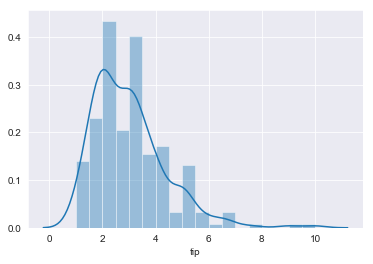

In [10]:
sns.set_style("darkgrid") # Let's leave this theme

sns.distplot(tips['tip'])

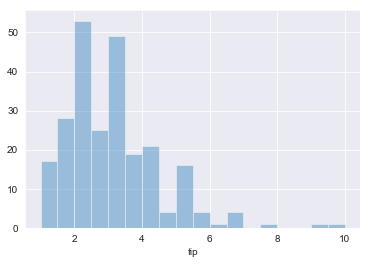

In [11]:
sns.distplot(tips['tip'], kde=False)

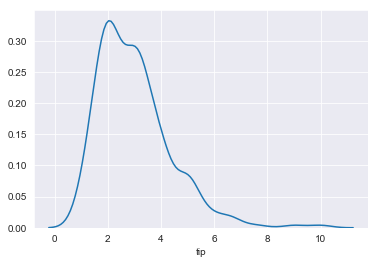

In [12]:
sns.distplot(tips['tip'], hist=False)

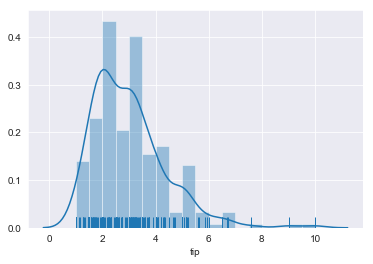

In [13]:
sns.distplot(tips['tip'], rug=True )

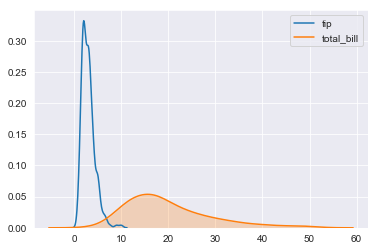

In [14]:
sns.kdeplot(tips['tip'])
sns.kdeplot(tips['total_bill'], shade=True)

# Bidimensional plots

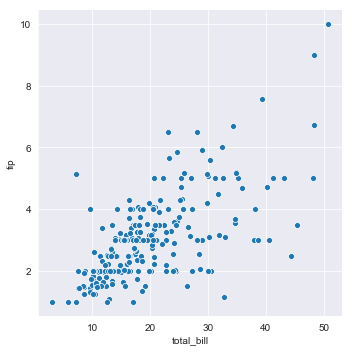

In [15]:
sns.relplot(x="total_bill", y="tip", data=tips)

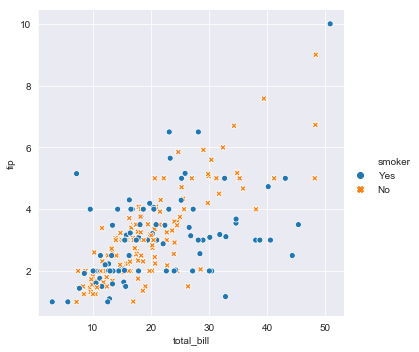

In [16]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker", data=tips)

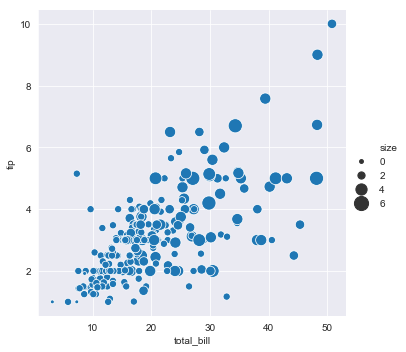

In [17]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips)

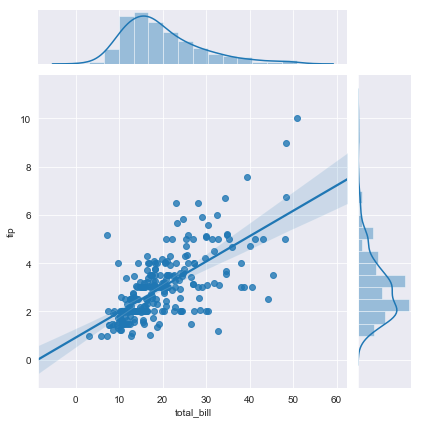

In [18]:
sns.jointplot("total_bill", "tip", tips, kind="reg")

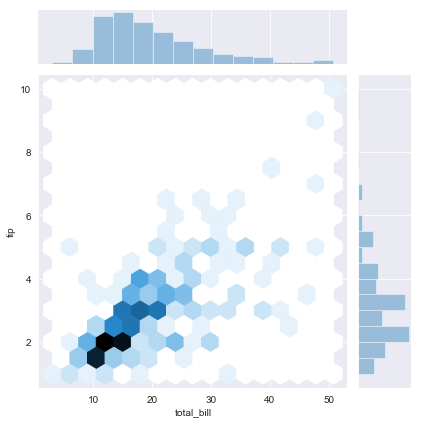

In [19]:
sns.jointplot("total_bill", "tip", tips ,kind="hex")

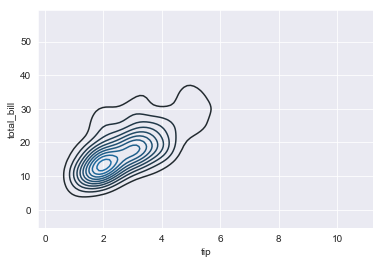

In [20]:
sns.kdeplot(tips['tip'], tips['total_bill'])

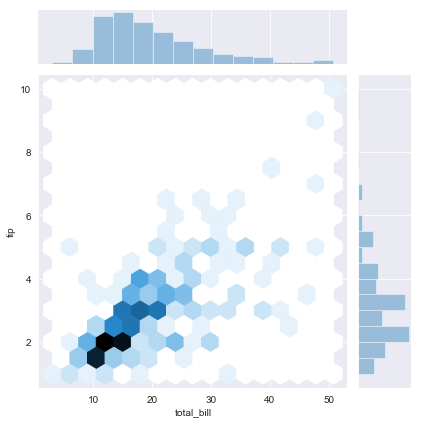

In [21]:
sns.jointplot("total_bill", "tip", tips, kind="hex")

# Multivariable plots

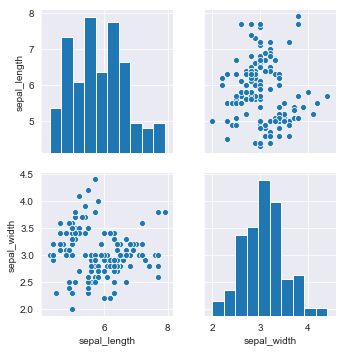

In [22]:
sns.pairplot(iris , vars=["sepal_length", "sepal_width"])

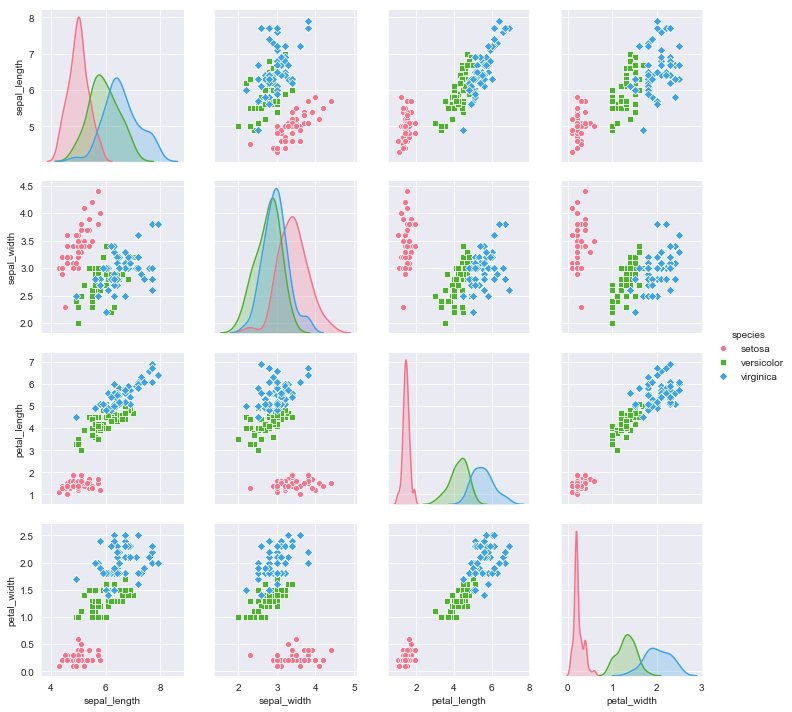

In [23]:
sns.pairplot(iris , hue="species", palette="husl", markers=["o", "s", "D"], diag_kind='kde')

# Plotting categorical attributes

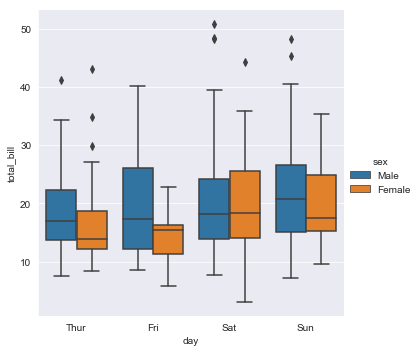

In [24]:
sns.catplot("day", "total_bill", "sex", data=tips , kind="box")

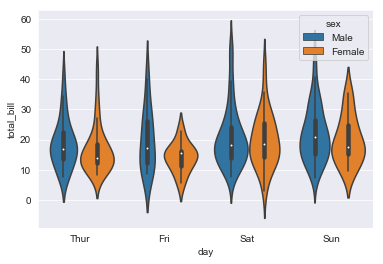

In [25]:
sns.violinplot("day", "total_bill", "sex", data=tips)

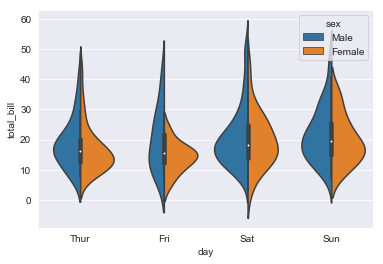

In [26]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips , split=True)

<img src="https://github.com/dfbarrero/pythonCourse/blob/master/scipy/figs/violin_plots.png?raw=true">

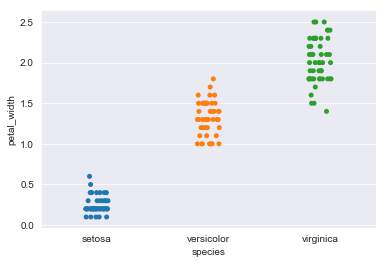

In [27]:
sns.stripplot(x="species", y="petal_width", data=iris)

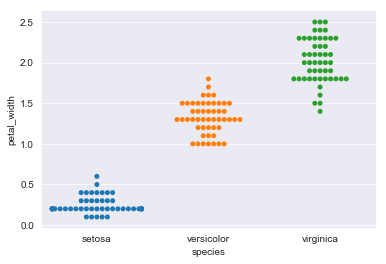

In [28]:
sns.swarmplot(x="species", y="petal_width", data=iris)

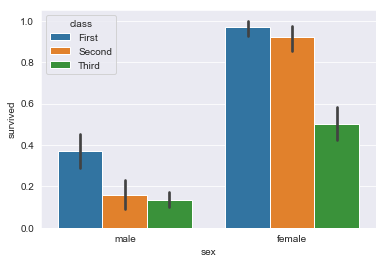

In [29]:
titanic = sns.load_dataset("titanic")
sns.barplot(x="sex", y="survived", hue="class", data=titanic)

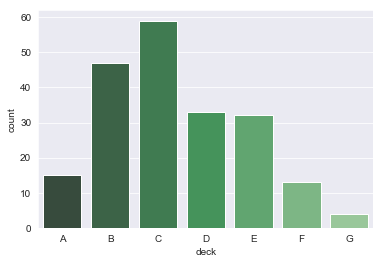

In [30]:
sns.countplot(x="deck", data=titanic, palette="Greens_d")

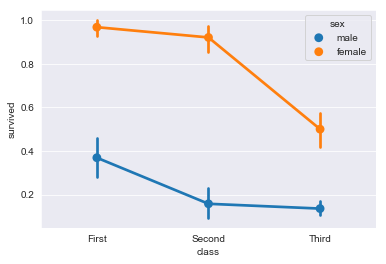

In [31]:
sns.pointplot(x="class", y="survived", hue="sex", data=titanic)

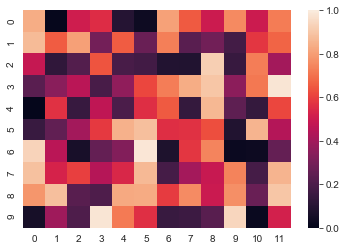

In [32]:
 sns.heatmap(np.random.rand(10, 12),vmin=0,vmax=1) 

# Plotting continous data

In [33]:
fmri = sns.load_dataset("fmri") 
print(fmri.head())

  subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970


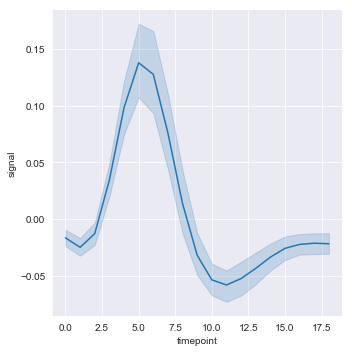

In [34]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)

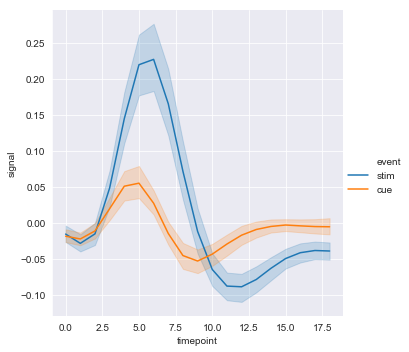

In [35]:
sns.relplot(x="timepoint", y="signal", kind="line", hue="event", data=fmri)

# Comparing several plots

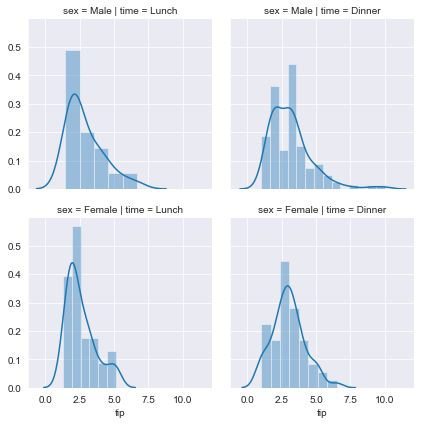

In [36]:
g = sns.FacetGrid(tips, col="time", row="sex")
g.map(sns.distplot, "tip")

# Customizations

(0, 0.8)

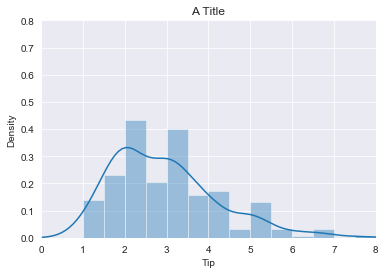

In [37]:
sns.distplot(tips['tip'])
plt.title("A Title")
plt.ylabel("Density")
plt.xlabel("Tip")
plt.xlim(0, 8)
plt.ylim(0, 0.8)

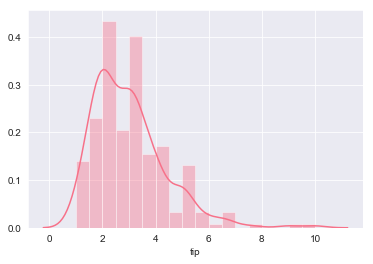

In [38]:
sns.set_palette("husl",3)
sns.distplot(tips['tip'])

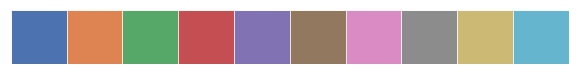

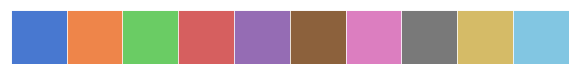

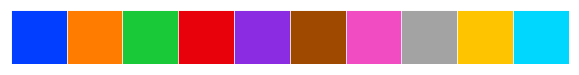

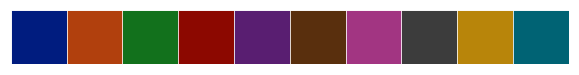

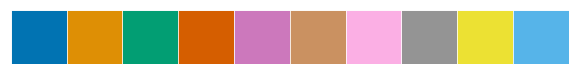

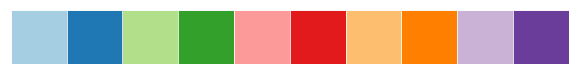

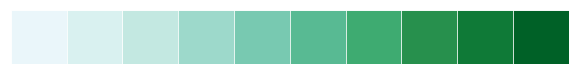

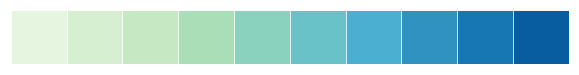

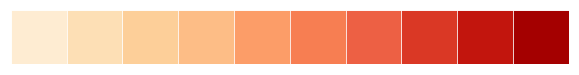

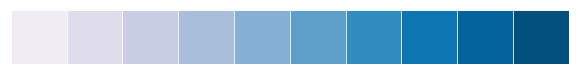

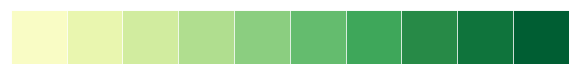

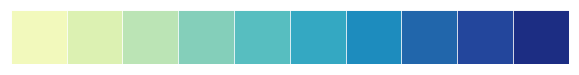

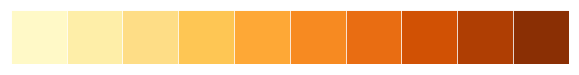

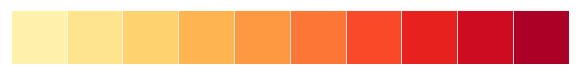

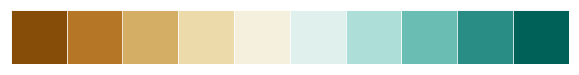

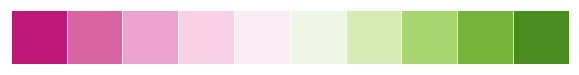

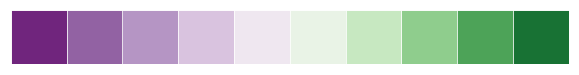

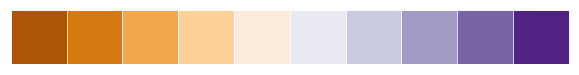

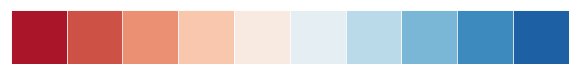

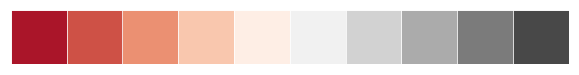

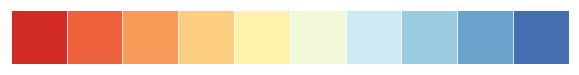

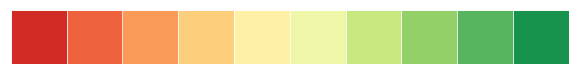

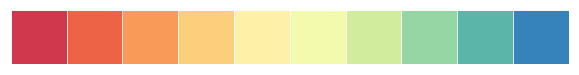

In [39]:
plt.rcParams.update({'figure.max_open_warning': 0}) # Avoid warning, not relevant

sns.palplot(sns.color_palette("deep", 10))
sns.palplot(sns.color_palette("muted", 10))
sns.palplot(sns.color_palette("bright", 10))
sns.palplot(sns.color_palette("dark", 10))
sns.palplot(sns.color_palette("colorblind", 10))
sns.palplot(sns.color_palette("Paired", 10))
sns.palplot(sns.color_palette("BuGn", 10))
sns.palplot(sns.color_palette("GnBu", 10))
sns.palplot(sns.color_palette("OrRd", 10))
sns.palplot(sns.color_palette("PuBu", 10))
sns.palplot(sns.color_palette("YlGn", 10))
sns.palplot(sns.color_palette("YlGnBu", 10))
sns.palplot(sns.color_palette("YlOrBr", 10))
sns.palplot(sns.color_palette("YlOrRd", 10))
sns.palplot(sns.color_palette("BrBG", 10))
sns.palplot(sns.color_palette("PiYG", 10))
sns.palplot(sns.color_palette("PRGn", 10))
sns.palplot(sns.color_palette("PuOr", 10))
sns.palplot(sns.color_palette("RdBu", 10))
sns.palplot(sns.color_palette("RdGy", 10))
sns.palplot(sns.color_palette("RdYlBu", 10))
sns.palplot(sns.color_palette("RdYlGn", 10))
sns.palplot(sns.color_palette("Spectral", 10))

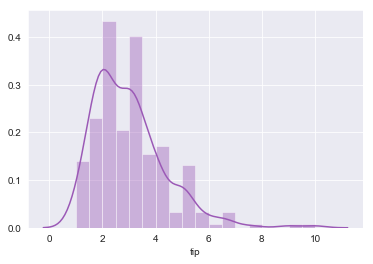

In [40]:
flatui = ["#9b59b6","#3498db","#95a5a6","#e74c3c","#34495e","#2ecc71"]
sns.set_palette(flatui) 
sns.distplot(tips['tip'])

# Final remarks

In [41]:
plt.show() # Show pic in script and event loop
plt.savefig("mypic.png") # Save plot
plt.savefig("mypic.png", transparent=True) # Save plot

<Figure size 432x288 with 0 Axes>

Supported file formats:

In [42]:
plt.gcf().canvas.get_supported_filetypes_grouped()

{'Postscript': ['ps'],
 'Encapsulated Postscript': ['eps'],
 'Portable Document Format': ['pdf'],
 'PGF code for LaTeX': ['pgf'],
 'Portable Network Graphics': ['png'],
 'Raw RGBA bitmap': ['raw', 'rgba'],
 'Scalable Vector Graphics': ['svg', 'svgz']}

<Figure size 432x288 with 0 Axes>

<img src="https://github.com/dfbarrero/pythonCourse/blob/master/scipy/figs/self_description.png?raw=true">